In [4]:
import pandas as pd

df = pd.read_csv('vgsales.csv')
df = df.dropna(subset=['Year', 'Global_Sales', 'Genre'])
df['Year'] = df['Year'].astype(int)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df['is_hit'] = (df['Global_Sales'] > 1.0).astype(int)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_genre = LabelEncoder()
label_platform = LabelEncoder()

df['Genre_encoded'] = label_genre.fit_transform(df['Genre'])
df['Platform_encoded'] = label_platform.fit_transform(df['Platform'])

In [7]:
from sklearn.model_selection import train_test_split

features = ['Genre_encoded', 'Platform_encoded', 'Year']
x = df[features]
y = df['is_hit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8799755052051439
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2886
           1       0.42      0.08      0.14       380

    accuracy                           0.88      3266
   macro avg       0.65      0.53      0.54      3266
weighted avg       0.84      0.88      0.84      3266



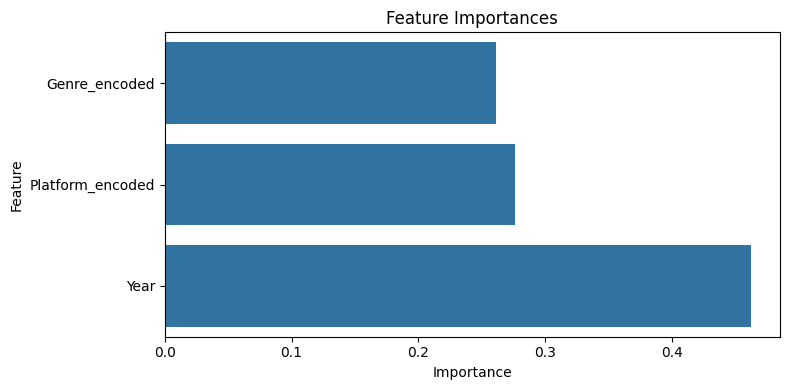

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = x.columns

plt.figure(figsize=(8, 4))
sns.barplot(y=feature_names, x=importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()